In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import pathlib
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split

In [2]:
path=pathlib.Path('F:\open_zip\zomato\zomato.csv')

In [3]:
data=pd.read_csv(path)

In [4]:
data

,url,address,name,online_order,book_table,rate,votes,phone,location,rest_type,dish_liked,cuisines,approx_cost(for two people),reviews_list,menu_item,listed_in(type),listed_in(city)
0,https://www.zomato.com/bangalore/jalsa-banasha...,"942, 21st Main Road, 2nd Stage, Banashankari, ...",Jalsa,Yes,Yes,4.1/5,775,080 42297555\r\n+91 9743772233,Banashankari,Casual Dining,"Pasta, Lunch Buffet, Masala Papad, Paneer Laja...","North Indian, Mughlai, Chinese",800,"[('Rated 4.0', 'RATED\n A beautiful place to ...",[],Buffet,Banashankari
1,https://www.zomato.com/bangalore/spice-elephan...,"2nd Floor, 80 Feet Road, Near Big Bazaar, 6th ...",Spice Elephant,Yes,No,4.1/5,787,080 41714161,Banashankari,Casual Dining,"Momos, Lunch Buffet, Chocolate Nirvana, Thai G...","Chinese, North Indian, Thai",800,"[('Rated 4.0', 'RATED\n Had been here for din...",[],Buffet,Banashankari
2,https://www.zomato.com/SanchurroBangalore?cont...,"1112, Next to KIMS Medical College, 17th Cross...",San Churro Cafe,Yes,No,3.8/5,918,+91 9663487993,Banashankari,"Cafe, Casual Dining","Churros, Cannelloni, Minestrone Soup, Hot Choc...","Cafe, Mexican, Italian",800,"[('Rated 3.0', ""RATED\n Ambience is not that ...",[],Buffet,Banashankari
3,https://www.zomato.com/bangalore/addhuri-udupi...,"1st Floor, Annakuteera, 3rd Stage, Banashankar...",Addhuri Udupi Bhojana,No,No,3.7/5,88,+91 9620009302,Banashankari,Quick Bites,Masala Dosa,"South Indian, North Indian",300,"[('Rated 4.0', ""RATED\n Great food and proper...",[],Buffet,Banashankari
4,https://www.zomato.com/bangalore/grand-village...,"10, 3rd Floor, Lakshmi Associates, Gandhi Baza...",Grand Village,No,No,3.8/5,166,+91 8026612447\r\n+91 9901210005,Basavanagudi,Casual Dining,"Panipuri, Gol Gappe","North Indian, Rajasthani",600,"[('Rated 4.0', 'RATED\n Very good restaurant ...",[],Buffet,Banashankari
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
51712,https://www.zomato.com/bangalore/best-brews-fo...,"Four Points by Sheraton Bengaluru, 43/3, White...",Best Brews - Four Points by Sheraton Bengaluru...,No,No,3.6 /5,27,080 40301477,Whitefield,Bar,NaN,Continental,"1,500","[('Rated 5.0', ""RATED\n Food and service are ...",[],Pubs and bars,Whitefield
51713,https://www.zomato.com/bangalore/vinod-bar-and...,"Number 10, Garudachar Palya, Mahadevapura, Whi...",Vinod Bar And Restaurant,No,No,NaN,0,+91 8197675843,Whitefield,Bar,NaN,Finger Food,600,[],[],Pubs and bars,Whitefield
51714,https://www.zomato.com/bangalore/plunge-sherat...,Sheraton Grand Bengaluru Whitefield Hotel & Co...,Plunge - Sheraton Grand Bengaluru Whitefield H...,No,No,NaN,0,NaN,Whitefield,Bar,NaN,Finger Food,"2,000",[],[],Pubs and bars,Whitefield
51715,https://www.zomato.com/bangalore/chime-sherato...,Sheraton Grand Bengaluru Whitefield Hotel & Co...,Chime - Sheraton Grand Bengaluru Whitefield Ho...,No,Yes,4.3 /5,236,080 49652769,"ITPL Main Road, Whitefield",Bar,"Cocktails, Pizza, Buttermilk",Finger Food,"2,500","[('Rated 4.0', 'RATED\n Nice and friendly pla...",[],Pubs and bars,Whitefield


In [5]:
zomato=data.drop(['url','phone','dish_liked'],axis=1)

In [6]:
#data.head()

In [7]:
zomato.isnull().sum()

address                           0
name                              0
online_order                      0
book_table                        0
rate                           7775
votes                             0
location                         21
rest_type                       227
cuisines                         45
approx_cost(for two people)     346
reviews_list                      0
menu_item                         0
listed_in(type)                   0
listed_in(city)                   0
dtype: int64

In [8]:
zomato.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 51717 entries, 0 to 51716
Data columns (total 14 columns):
 #   Column                       Non-Null Count  Dtype 
---  ------                       --------------  ----- 
 0   address                      51717 non-null  object
 1   name                         51717 non-null  object
 2   online_order                 51717 non-null  object
 3   book_table                   51717 non-null  object
 4   rate                         43942 non-null  object
 5   votes                        51717 non-null  int64 
 6   location                     51696 non-null  object
 7   rest_type                    51490 non-null  object
 8   cuisines                     51672 non-null  object
 9   approx_cost(for two people)  51371 non-null  object
 10  reviews_list                 51717 non-null  object
 11  menu_item                    51717 non-null  object
 12  listed_in(type)              51717 non-null  object
 13  listed_in(city)              51

In [9]:
zomato.duplicated().sum() ### chck for duplicate value

43

In [10]:
zomato.drop_duplicates(inplace=True)

In [11]:
zomato.duplicated().sum()

0

In [12]:
zomato.isnull().sum()

address                           0
name                              0
online_order                      0
book_table                        0
rate                           7767
votes                             0
location                         21
rest_type                       227
cuisines                         45
approx_cost(for two people)     345
reviews_list                      0
menu_item                         0
listed_in(type)                   0
listed_in(city)                   0
dtype: int64

In [13]:
zomato.dropna(how="any",inplace=True)

In [14]:
zomato.columns

Index(['address', 'name', 'online_order', 'book_table', 'rate', 'votes',
       'location', 'rest_type', 'cuisines', 'approx_cost(for two people)',
       'reviews_list', 'menu_item', 'listed_in(type)', 'listed_in(city)'],
      dtype='object')

In [15]:
zomato.rename(columns={'approx_cost(for two people)':'cost','listed_in(type)':'type',
              'listed_in(city)':'city'},inplace=True)

In [16]:
zomato['cost'].unique()

array(['800', '300', '600', '700', '550', '500', '450', '650', '400',
       '900', '200', '750', '150', '850', '100', '1,200', '350', '250',
       '950', '1,000', '1,500', '1,300', '199', '80', '1,100', '160',
       '1,600', '230', '130', '1,700', '1,400', '1,350', '2,200', '2,000',
       '1,800', '1,900', '180', '330', '2,500', '2,100', '3,000', '2,800',
       '3,400', '50', '40', '1,250', '3,500', '4,000', '2,400', '2,600',
       '1,450', '70', '3,200', '560', '240', '360', '6,000', '1,050',
       '2,300', '4,100', '120', '5,000', '3,700', '1,650', '2,700',
       '4,500'], dtype=object)

In [17]:
zomato['cost']=zomato['cost'].astype(str) ##changing into string
zomato['cost']=zomato['cost'].apply(lambda x: x.replace(',','.'))
zomato['cost']=zomato['cost'].astype(float)

In [18]:
zomato['cost'].unique()

array([800.  , 300.  , 600.  , 700.  , 550.  , 500.  , 450.  , 650.  ,
       400.  , 900.  , 200.  , 750.  , 150.  , 850.  , 100.  ,   1.2 ,
       350.  , 250.  , 950.  ,   1.  ,   1.5 ,   1.3 , 199.  ,  80.  ,
         1.1 , 160.  ,   1.6 , 230.  , 130.  ,   1.7 ,   1.4 ,   1.35,
         2.2 ,   2.  ,   1.8 ,   1.9 , 180.  , 330.  ,   2.5 ,   2.1 ,
         3.  ,   2.8 ,   3.4 ,  50.  ,  40.  ,   1.25,   3.5 ,   4.  ,
         2.4 ,   2.6 ,   1.45,  70.  ,   3.2 , 560.  , 240.  , 360.  ,
         6.  ,   1.05,   2.3 ,   4.1 , 120.  ,   5.  ,   3.7 ,   1.65,
         2.7 ,   4.5 ])

In [19]:
zomato['rate'].unique()

array(['4.1/5', '3.8/5', '3.7/5', '3.6/5', '4.6/5', '4.0/5', '4.2/5',
       '3.9/5', '3.1/5', '3.0/5', '3.2/5', '3.3/5', '2.8/5', '4.4/5',
       '4.3/5', 'NEW', '2.9/5', '3.5/5', '2.6/5', '3.8 /5', '3.4/5',
       '4.5/5', '2.5/5', '2.7/5', '4.7/5', '2.4/5', '2.2/5', '2.3/5',
       '3.4 /5', '-', '3.6 /5', '4.8/5', '3.9 /5', '4.2 /5', '4.0 /5',
       '4.1 /5', '3.7 /5', '3.1 /5', '2.9 /5', '3.3 /5', '2.8 /5',
       '3.5 /5', '2.7 /5', '2.5 /5', '3.2 /5', '2.6 /5', '4.5 /5',
       '4.3 /5', '4.4 /5', '4.9/5', '2.1/5', '2.0/5', '1.8/5', '4.6 /5',
       '4.9 /5', '3.0 /5', '4.8 /5', '2.3 /5', '4.7 /5', '2.4 /5',
       '2.1 /5', '2.2 /5', '2.0 /5', '1.8 /5'], dtype=object)

In [20]:
zomato=zomato.loc[zomato.rate !='NEW']
zomato=zomato.loc[zomato.rate !='-'].reset_index(drop=True)
remove_slash=lambda x:x.replace('/5','')if type(x)==np.str else x
zomato['rate']=zomato.rate.apply(remove_slash).str.strip().astype(float)

In [21]:
zomato.rate.head()

0    4.1
1    4.1
2    3.8
3    3.7
4    3.8
Name: rate, dtype: float64

In [22]:
# Adjust the column names
zomato.name = zomato.name.apply(lambda x:x.title())
zomato.online_order.replace(('Yes','No'),(True,False),inplace=True)
zomato.book_table.replace(('Yes','No'),(True,False),inplace=True)

In [23]:
zomato.head()

,address,name,online_order,book_table,rate,votes,location,rest_type,cuisines,cost,reviews_list,menu_item,type,city
0,"942, 21st Main Road, 2nd Stage, Banashankari, ...",Jalsa,True,True,4.1,775,Banashankari,Casual Dining,"North Indian, Mughlai, Chinese",800.0,"[('Rated 4.0', 'RATED\n A beautiful place to ...",[],Buffet,Banashankari
1,"2nd Floor, 80 Feet Road, Near Big Bazaar, 6th ...",Spice Elephant,True,False,4.1,787,Banashankari,Casual Dining,"Chinese, North Indian, Thai",800.0,"[('Rated 4.0', 'RATED\n Had been here for din...",[],Buffet,Banashankari
2,"1112, Next to KIMS Medical College, 17th Cross...",San Churro Cafe,True,False,3.8,918,Banashankari,"Cafe, Casual Dining","Cafe, Mexican, Italian",800.0,"[('Rated 3.0', ""RATED\n Ambience is not that ...",[],Buffet,Banashankari
3,"1st Floor, Annakuteera, 3rd Stage, Banashankar...",Addhuri Udupi Bhojana,False,False,3.7,88,Banashankari,Quick Bites,"South Indian, North Indian",300.0,"[('Rated 4.0', ""RATED\n Great food and proper...",[],Buffet,Banashankari
4,"10, 3rd Floor, Lakshmi Associates, Gandhi Baza...",Grand Village,False,False,3.8,166,Basavanagudi,Casual Dining,"North Indian, Rajasthani",600.0,"[('Rated 4.0', 'RATED\n Very good restaurant ...",[],Buffet,Banashankari


In [24]:
## Encode the input variable
def encode(zomato):
    for col in zomato.columns[~zomato.columns.isin(['rate','cost','votes'])]:
        zomato[col]=zomato[col].factorize()[0]
    return zomato

In [25]:
f_zomato=encode(zomato.copy())

In [26]:
f_zomato

,address,name,online_order,book_table,rate,votes,location,rest_type,cuisines,cost,reviews_list,menu_item,type,city
0,0,0,0,0,4.1,775,0,0,0,800.0,0,0,0,0
1,1,1,0,1,4.1,787,0,0,1,800.0,1,0,0,0
2,2,2,0,1,3.8,918,0,1,2,800.0,2,0,0,0
3,3,3,1,1,3.7,88,0,2,3,300.0,3,0,0,0
4,4,4,1,1,3.8,166,1,0,4,600.0,4,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
41232,3137,2699,1,1,3.7,34,25,28,204,800.0,4028,0,6,29
41233,8791,1716,1,1,2.5,81,25,28,761,800.0,21082,0,6,29
41234,8725,6532,1,1,3.6,27,25,17,240,1.5,20956,0,6,29
41235,8786,6568,1,0,4.3,236,56,17,237,2.5,21054,0,6,29


Index(['address', 'name', 'online_order', 'book_table', 'rate', 'votes',
       'location', 'rest_type', 'cuisines', 'cost', 'reviews_list',
       'menu_item', 'type', 'city'],
      dtype='object')

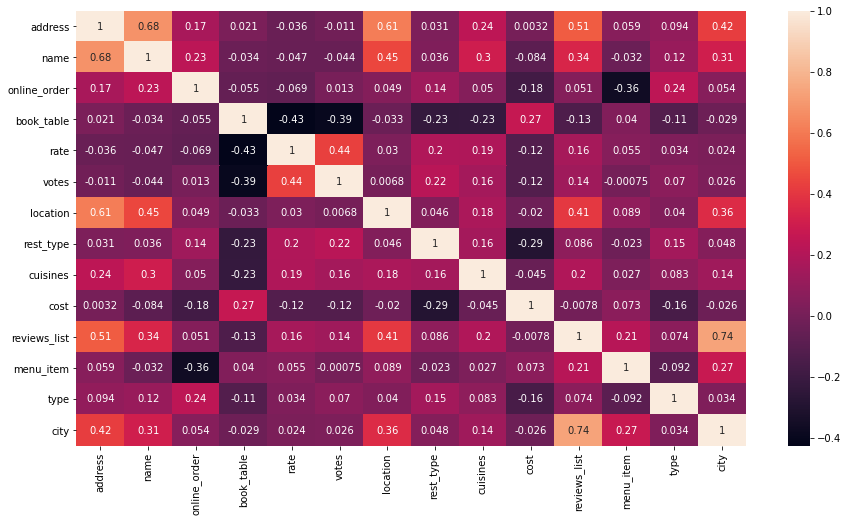

In [27]:
corr=f_zomato.corr(method='pearson')
plt.figure(figsize=(15,8))
sns.heatmap(corr,annot=True)
f_zomato.columns

In [28]:
X=f_zomato.iloc[:,[2,3,5,6,7,8,9,11]]
y=f_zomato['rate']

In [29]:
X_train, X_test, y_train, y_test = train_test_split(
...     X, y, test_size=0.33, random_state=42)

In [30]:
f_zomato.menu_item.unique()

array([   0,    1,    2, ..., 8240, 8241, 8242], dtype=int64)

Data visiualization

In [31]:
f_zomato.columns

Index(['address', 'name', 'online_order', 'book_table', 'rate', 'votes',
       'location', 'rest_type', 'cuisines', 'cost', 'reviews_list',
       'menu_item', 'type', 'city'],
      dtype='object')

Restaurants delivering Online or not

Text(0.5, 1.0, 'Online order or not')

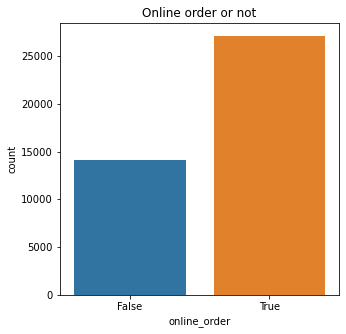

In [32]:
sns.countplot(zomato['online_order'])
fig=plt.gcf()
fig.set_size_inches((5,5))
plt.title("Online order or not")

Restaurants allowing table booking or not

Text(0.5, 1.0, 'book_table or not')

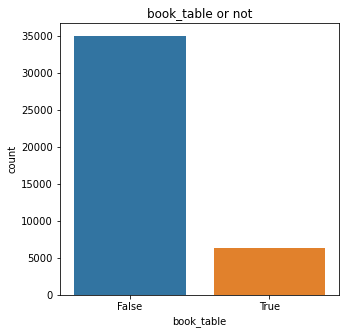

In [33]:
sns.countplot(zomato['book_table'])
fig=plt.gcf()
fig.set_size_inches((5,5))
plt.title("book_table or not")

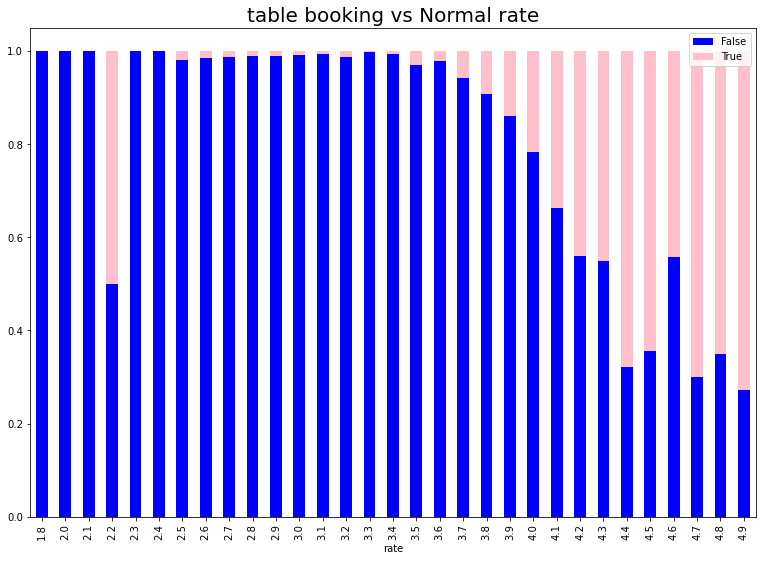

In [34]:
plt.rcParams['figure.figsize']=(13,9)
y=pd.crosstab(zomato['rate'],zomato['book_table'])
y.div(y.sum(1).astype(float),axis=0).plot(kind='bar',stacked=True,color=['blue','pink'])
plt.title('table booking vs Normal rate', fontweight = 30, fontsize = 20)
plt.legend(loc="upper right")
plt.show()

Text(0.5, 1.0, 'Location wise count for restaurants')

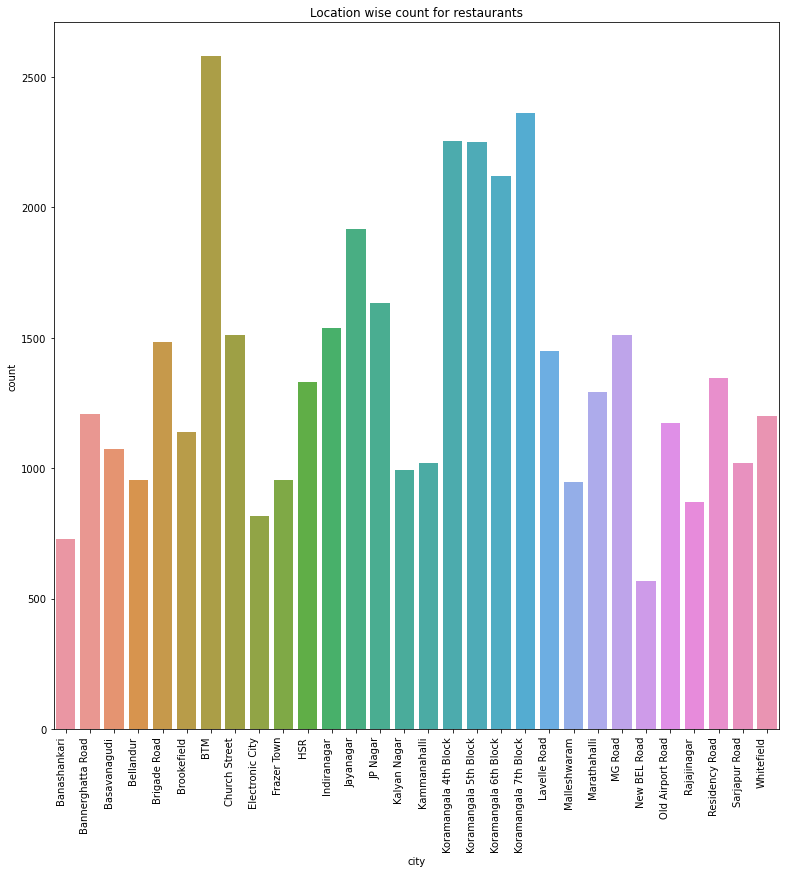

In [35]:
sns.countplot(zomato['city'])
sns.countplot(zomato['city']).set_xticklabels(sns.countplot(zomato['city']).get_xticklabels(), rotation=90, ha="right")
fig = plt.gcf()
fig.set_size_inches(13,13)
plt.title('Location wise count for restaurants')

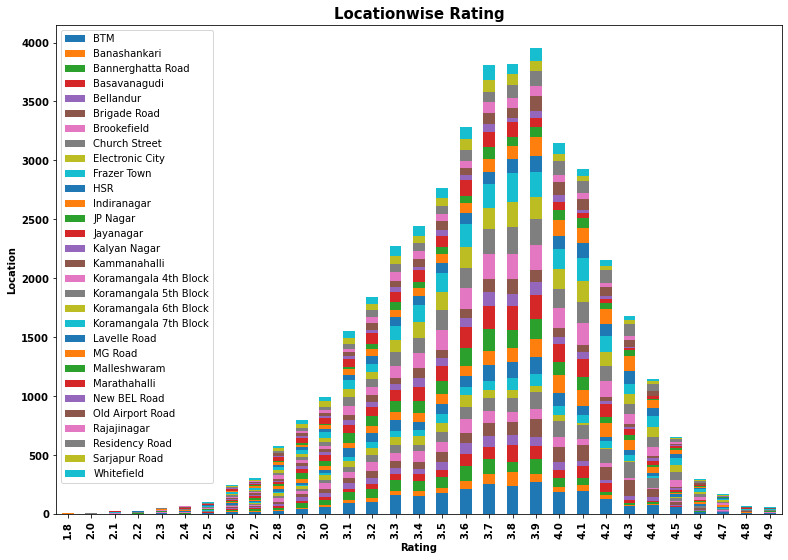

In [36]:
loc_plt=pd.crosstab(zomato['rate'],zomato['city'])
loc_plt.plot(kind='bar',stacked=True);
plt.title('Locationwise Rating',fontsize=15,fontweight='bold')
plt.ylabel('Location',fontsize=10,fontweight='bold')
plt.xlabel('Rating',fontsize=10,fontweight='bold')
plt.xticks(fontsize=10,fontweight='bold')
plt.yticks(fontsize=10,fontweight='bold');
plt.legend();

Text(0.5, 1.0, 'Restuarant Type')

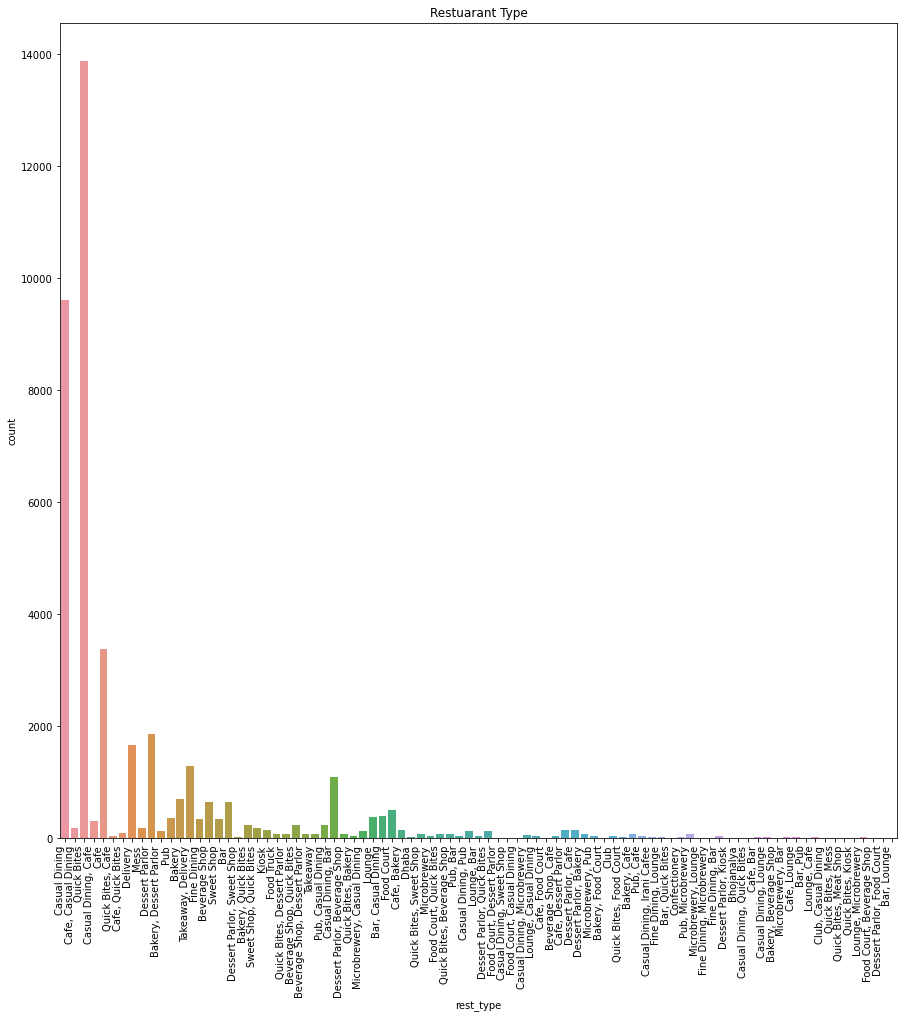

In [37]:

sns.countplot(zomato['rest_type'])
sns.countplot(zomato['rest_type']).set_xticklabels(sns.countplot(zomato['rest_type']).get_xticklabels(), rotation=90, ha="right")
fig = plt.gcf()
fig.set_size_inches(15,15)
plt.title('Restuarant Type')

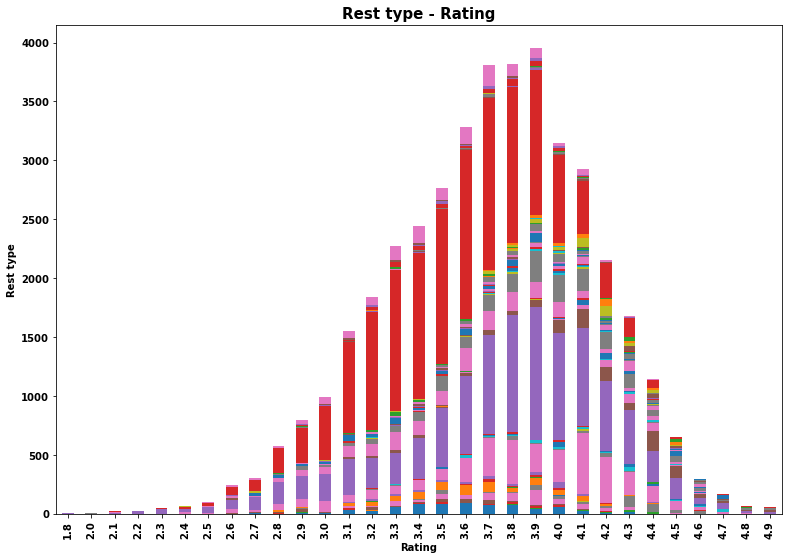

In [38]:
loc_plt=pd.crosstab(zomato['rate'],zomato['rest_type'])
loc_plt.plot(kind='bar',stacked=True);
plt.title('Rest type - Rating',fontsize=15,fontweight='bold')
plt.ylabel('Rest type',fontsize=10,fontweight='bold')
plt.xlabel('Rating',fontsize=10,fontweight='bold')
plt.xticks(fontsize=10,fontweight='bold')
plt.yticks(fontsize=10,fontweight='bold');
plt.legend().remove();

Text(0.5, 1.0, 'Type of Service')

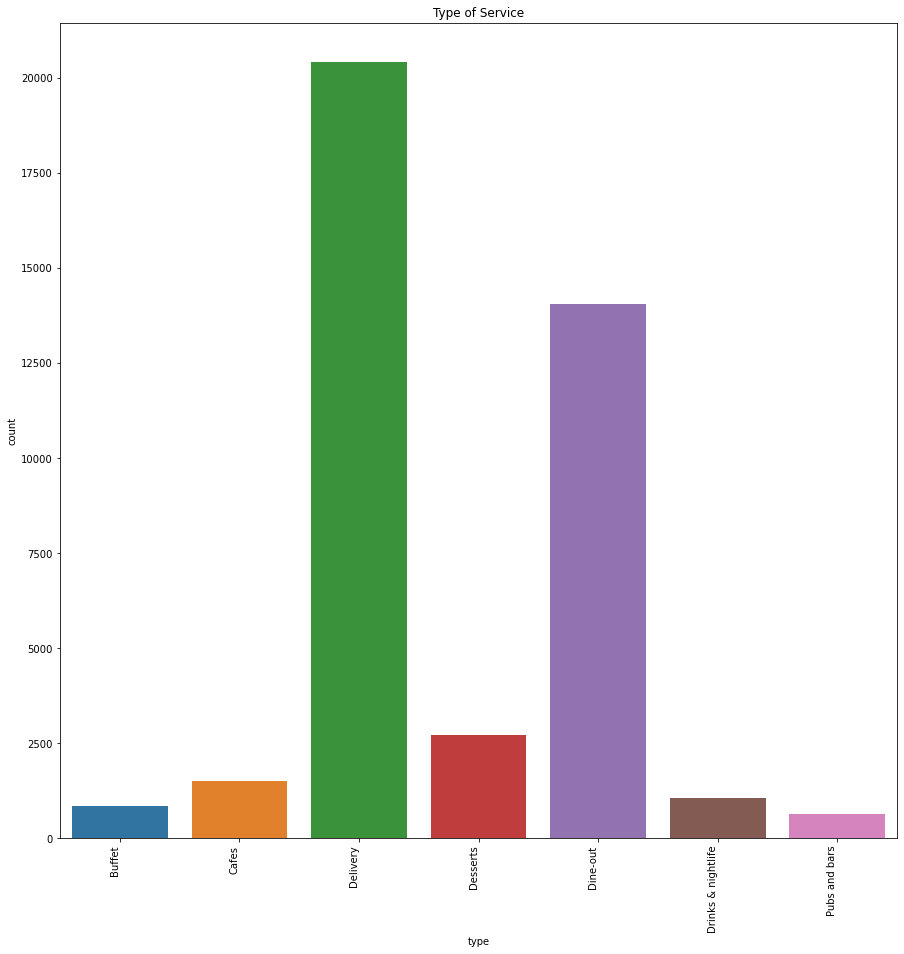

In [39]:
sns.countplot(zomato['type'])
sns.countplot(zomato['type']).set_xticklabels(sns.countplot(zomato['type']).get_xticklabels(), rotation=90, ha="right")
fig = plt.gcf()
fig.set_size_inches(15,15)
plt.title('Type of Service')

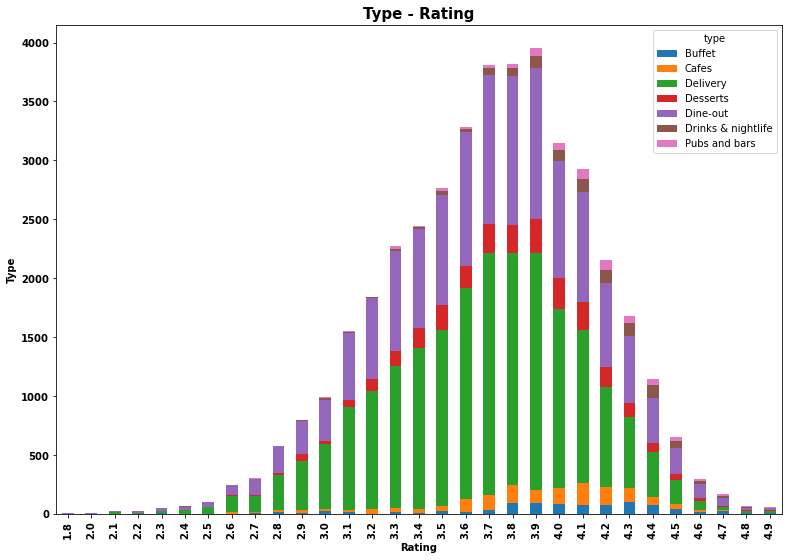

In [40]:
type_plt=pd.crosstab(zomato['rate'],zomato['type'])
type_plt.plot(kind='bar',stacked=True);
plt.title('Type - Rating',fontsize=15,fontweight='bold')
plt.ylabel('Type',fontsize=10,fontweight='bold')
plt.xlabel('Rating',fontsize=10,fontweight='bold')
plt.xticks(fontsize=10,fontweight='bold')
plt.yticks(fontsize=10,fontweight='bold');

Text(0.5, 1.0, 'Cost of Restuarant')

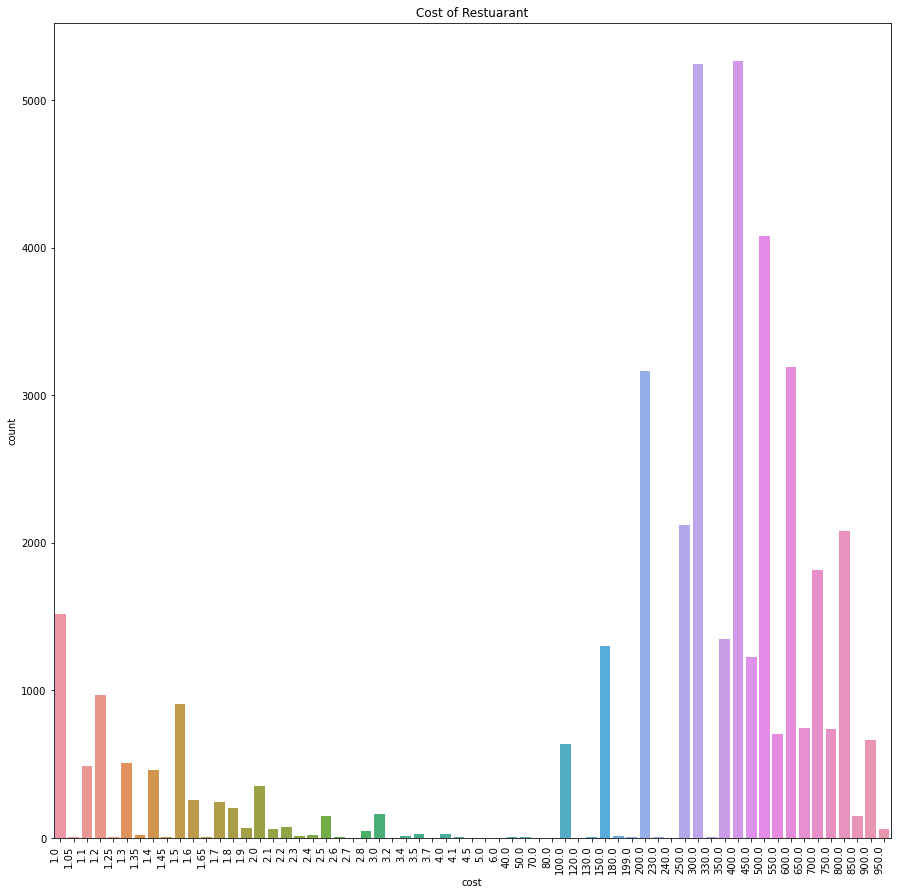

In [41]:
sns.countplot(zomato['cost'])
sns.countplot(zomato['cost']).set_xticklabels(sns.countplot(zomato['cost']).get_xticklabels(), rotation=90, ha="right")
fig = plt.gcf()
fig.set_size_inches(15,15)
plt.title('Cost of Restuarant')

Text(0.5, 1.0, 'NO. of restaurants in a Location')

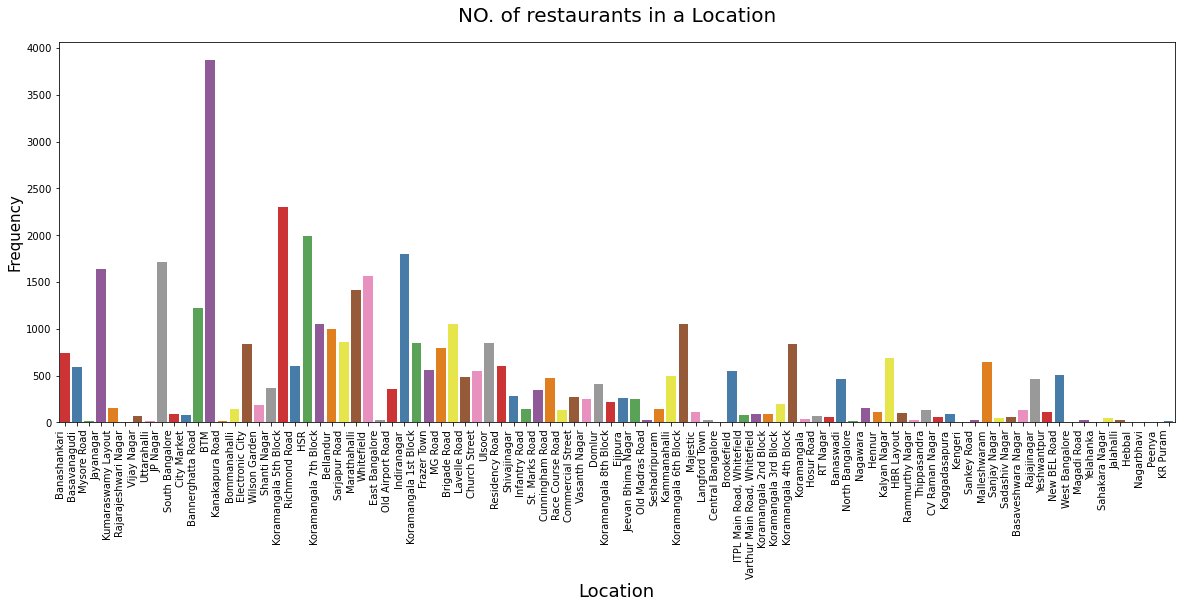

In [43]:
fig = plt.figure(figsize=(20,7))
loc = sns.countplot(x="location",data=zomato, palette = "Set1")
loc.set_xticklabels(loc.get_xticklabels(), rotation=90, ha="right")
plt.ylabel("Frequency",size=15)
plt.xlabel("Location",size=18)
loc
plt.title('NO. of restaurants in a Location',size = 20,pad=20)

Text(0.5, 1.0, 'Restaurant types')

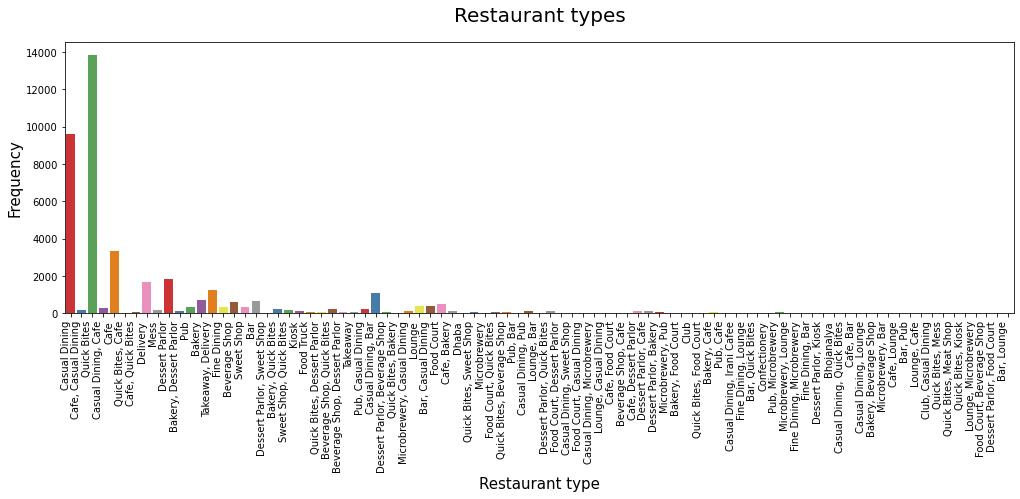

In [45]:
fig = plt.figure(figsize=(17,5))
rest = sns.countplot(x="rest_type",data=zomato, palette = "Set1")
rest.set_xticklabels(rest.get_xticklabels(), rotation=90, ha="right")
plt.ylabel("Frequency",size=15)
plt.xlabel("Restaurant type",size=15)
rest 
plt.title('Restaurant types',fontsize = 20 ,pad=20)

Text(0.5, 0, 'Number of outlets')

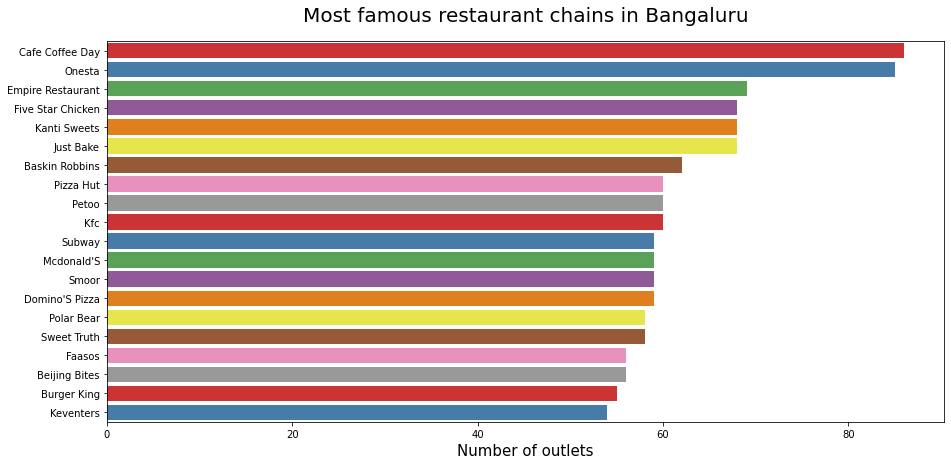

In [47]:
plt.figure(figsize=(15,7))
chains=zomato['name'].value_counts()[:20]
sns.barplot(x=chains,y=chains.index,palette='Set1')
plt.title("Most famous restaurant chains in Bangaluru",size=20,pad=20)
plt.xlabel("Number of outlets",size=15)

Models

In [48]:
from sklearn.linear_model import LinearRegression

In [50]:
#Prepare a Linear Regression Model
reg=LinearRegression()
reg.fit(X_train,y_train)
y_pred=reg.predict(X_test)
from sklearn.metrics import r2_score
r2_score(y_test,y_pred)

0.28468916572717173

In [53]:
#Prepairng a Decision Tree Regression
from sklearn.tree import DecisionTreeRegressor

DTree=DecisionTreeRegressor(min_samples_leaf=.0001)
DTree.fit(X_train,y_train)
y_predict=DTree.predict(X_test)
from sklearn.metrics import r2_score
r2_score(y_test,y_predict)

0.8039121464794894

In [54]:
#Preparing Random Forest REgression
from sklearn.ensemble import RandomForestRegressor
RForest=RandomForestRegressor(n_estimators=500,random_state=329,min_samples_leaf=.0001)
RForest.fit(X_train,y_train)
y_predict=RForest.predict(X_test)
from sklearn.metrics import r2_score
r2_score(y_test,y_predict)

0.8571216947909273

In [56]:
#Preparing Extra Tree Regression
from sklearn.ensemble import  ExtraTreesRegressor
ETree=ExtraTreesRegressor(n_estimators = 100)
ETree.fit(X_train,y_train)
y_predict=ETree.predict(X_test)


from sklearn.metrics import r2_score
r2_score(y_test,y_predict)

0.9054693852873961

In [57]:
import pickle
# Saving model to disk
pickle.dump(ETree, open('model.pkl','wb'))